# Earth's Orbit Around the Sun
## Jonathan Kelley


In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

/usr/local/Cellar/python/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


### Earth falling into the sun

Here's a question from the web site [Ask an Astronomer](http://curious.astro.cornell.edu/about-us/39-our-solar-system/the-earth/other-catastrophes/57-how-long-would-it-take-the-earth-to-fall-into-the-sun-intermediate):

"If the Earth suddenly stopped orbiting the Sun, I know eventually it would be pulled in by the Sun's gravity and hit it. How long would it take the Earth to hit the Sun? I imagine it would go slowly at first and then pick up speed."

Here's a solution.

In [2]:
# Here are the units we'll need

s = UNITS.second
N = UNITS.newton
kg = UNITS.kilogram
m = UNITS.meter

<Unit('meter')>

In [3]:
# And an inition condition (with everything in SI units)

r_0 = 147e9

init = State(x = r_0 * m,
             y = 0 * m,
             vx = 0 * m / s,
             vy = 0 * m / s )


,values
x,147000000000.0 meter
y,0 meter
vx,0.0 meter / second
vy,0.0 meter / second


In [4]:
# Making a system object

r_earth = 6.371e6 * m
r_sun = 695.508e6 * m

system = System(init=init,
                G=6.674e-11 * N / kg**2 * m**2,
                m1=1.989e30 * kg,
                r_final=r_sun + r_earth,
                m2=5.972e24 * kg,
                t_0=0 * s,
                t_end=1e8 * s)

,values
init,x 147000000000.0 meter y ...
G,6.674e-11 meter ** 2 * newton / kilogram ** 2
m1,1.989e+30 kilogram
r_final,701879000.0 meter
m2,5.972e+24 kilogram
t_0,0 second
t_end,100000000.0 second


In [5]:
# Here's a function that computes the force of gravity

def universal_gravitation(state, system):
    """Computes gravitational force.
    
    state: State object with distance r
    system: System object with m1, m2, and G
    """
    x, y, vx, vy = state
    unpack(system)
    p = Vector(x, y)
#    force = G * m1 * m2 / r**2
    
    force = (G * m1 * m2 / (p.mag)**2.0)  * p.hat()
    return Vector(force)

In [6]:
universal_gravitation(init, system)

<Quantity([3.6686486e+22 0.0000000e+00], 'newton')>

In [7]:
Vector(universal_gravitation(init, system)).mag

<Quantity(3.6686485997501037e+22, 'newton')>

In [8]:
# The slope function

def slope_func(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
    t: time
    system: System object containing `g`
    
    returns: derivatives of p and v (equal to velocity and acceleration)
    """
    x, y, vx, vy = state
    unpack(system)    

    force = universal_gravitation(state, system)
    dpdt = Vector(vx, vy)
    dvdt = -force / m2

    
    return vx, vy, dvdt.x, dvdt.y

In [9]:
# Always test the slope function!

slope_func(init, 0, system)

(<Quantity(0.0, 'meter / second')>,
 <Quantity(0.0, 'meter / second')>,
 <Quantity(-0.006143082049146188, 'newton / kilogram')>,
 <Quantity(-0.0, 'newton / kilogram')>)

In [10]:
# Here's an event function that stops the simulation
# before the collision

def event_func(state, t, system):
    x, y, vx, vy = state
    return abs(x) - system.r_final

In [11]:
# Always test the event function!

event_func(init, 0, system)

<Quantity(146298121000.0, 'meter')>

In [12]:
# Finally we can run the simulation

results, details = run_ode_solver(system, slope_func, events=event_func)
details

,values
message,A termination event occurred.
nfev,182
njev,0
nlu,0
sol,None
status,1
success,True
t_events,[[5432693.073385954]]


In [13]:
# Here's how long it takes...

t_final = get_last_label(results) * s

<Quantity(5432693.073385954, 'second')>

In [14]:
# ... expressed in units we understand

t_final.to(UNITS.day)

<Quantity(62.87839205307816, 'day')>

In [15]:
# Before plotting, we run the simulation again with `t_eval`

ts = linspace(t_0, t_final, 201)
results, details = run_ode_solver(system, slope_func, events=event_func, t_eval=ts)

In [16]:
# Scaling the time steps to days

results.index /= 60 * 60 * 24

In [17]:
# Scaling the distance to million km

r = results.x / 1e9;

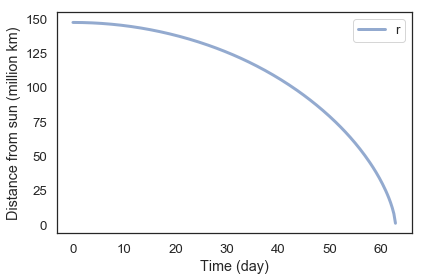

In [18]:
# And plotting

plot(r, label='r')

decorate(xlabel='Time (day)',
         ylabel='Distance from sun (million km)')

Text(0.5,1,'Orbit of Earth around the Sun')

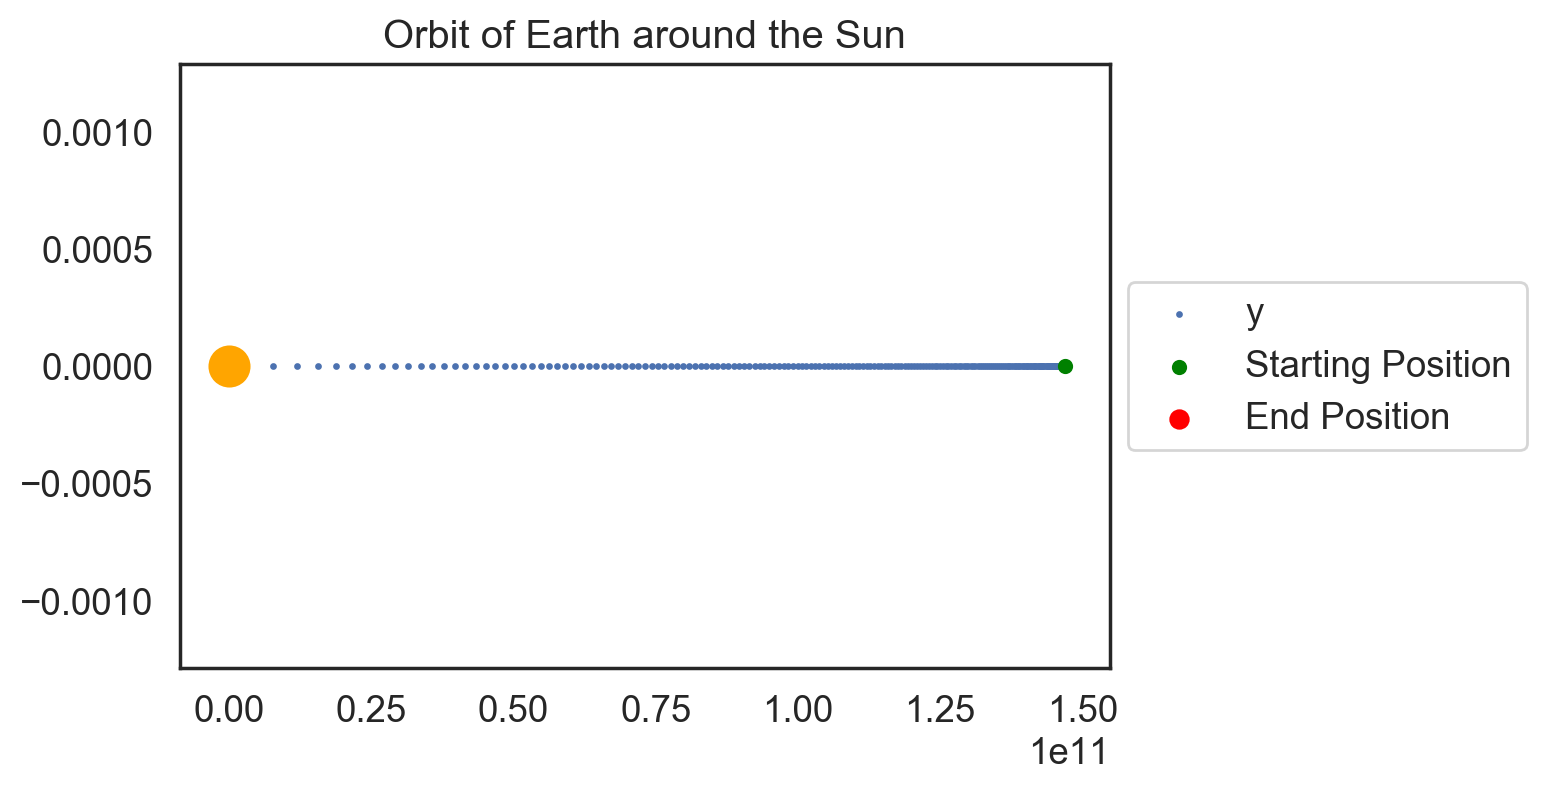

In [19]:
plt.figure(dpi =200)
plt.scatter(results.x, results.y, s = 2)
plt.scatter(results.x.iloc[0], results.y.iloc[0], color = 'green', s = 20, label = "Starting Position")
plt.scatter(results.x.iloc[-1], results.y.iloc[-1], color = 'red', s = 40, label = "End Position")
plt.scatter(0,0, color = "orange", s = 200)
#plt.gca().set_aspect('equal', adjustable='box')
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Orbit of Earth around the Sun")

### Let's test our code to make sure the Earth orbits the Sun

Text(0.5,1,'Orbit of Earth around the Sun')

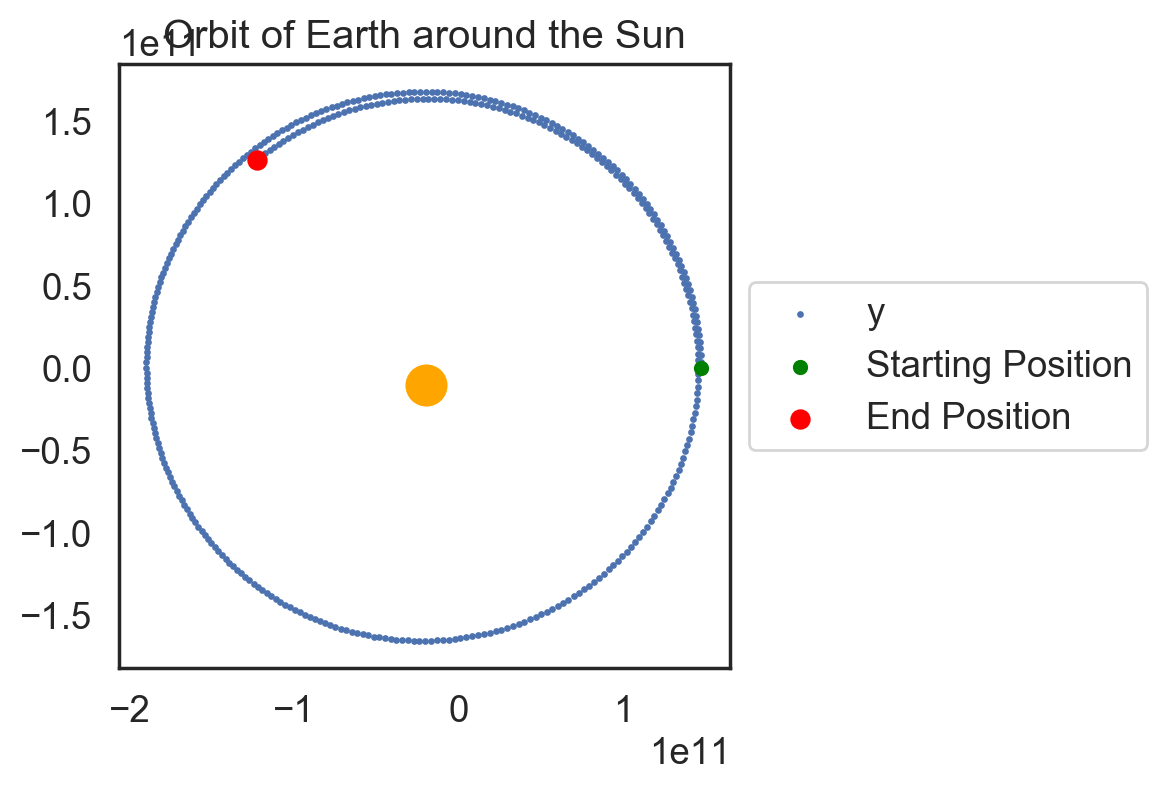

In [20]:
# And an inition condition (with everything in SI units)

r_0 = 147e9

init = State(x = r_0 * m,
             y = 0 * m,
             vx = 0 * m / s,
             vy = 32000 * m / s )

# Making a system object

r_earth = 6.371e6 * m
r_sun = 695.508e6 * m

system = System(init=init,
                G=6.674e-11 * N / kg**2 * m**2,
                m1=1.989e30 * kg,
                r_final=r_sun + r_earth,
                m2=5.972e24 * kg,
                t_0=0 * s,
                t_end=1e8 * s)

results, details = run_ode_solver(system, slope_func, events=event_func)

ts = linspace(t_0, 50000000.0, 401)
results, details = run_ode_solver(system, slope_func, events=event_func, t_eval=ts)

plt.figure(dpi =200)
plt.scatter(results.x, results.y, s = 2)
plt.scatter(results.x.iloc[0], results.y.iloc[0], color = 'green', s = 20, label = "Starting Position")
plt.scatter(results.x.iloc[-1], results.y.iloc[-1], color = 'red', s = 40, label = "End Position")
plt.scatter(-20000000000,-10000000000, color = "orange", s = 200)
plt.gca().set_aspect('equal', adjustable='box')
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Orbit of Earth around the Sun")

Huzzah! The earth orbits the sun. We would likely get a more consistent orbit with more timesteps. It looks good for now.